<a href="https://colab.research.google.com/github/sandhyadsandhyadas20-crypto/Coke-Sales-Analysis/blob/main/Chartgpt_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/chatgpt_reviews.csv',header =0)

In [ ]:
df

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39
...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,2023-07-27 16:26:31
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,2023-09-23 16:25:18
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,2023-11-08 13:57:14
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,2023-07-25 15:32:57


# Task
Explore the `df` DataFrame by displaying the first few rows, checking column information, and generating descriptive statistics to understand its structure and content. Then, perform sentiment analysis on the 'Review' column to generate sentiment scores or labels, and visualize the distribution of sentiments. Next, analyze and visualize how the average sentiment changes over time after converting 'Review Date' to datetime objects. Afterward, identify and visualize key themes in negative reviews using frequent words or phrases. Finally, summarize the key findings, including user preferences and frustrations, to provide actionable insights for potential improvements to ChatGPT.

## Explore DataFrame

### Subtask:
Display the first few rows, column information, and descriptive statistics of the `df` DataFrame to understand its structure and content.


**Reasoning**:
To understand the structure and content of the DataFrame, I will display the first few rows, column information, and descriptive statistics using `head()`, `info()`, and `describe()` methods.



In [ ]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   

## Perform Sentiment Analysis

### Subtask:
Apply a sentiment analysis tool (e.g., using a library like `TextBlob` or a pre-trained model) to the 'Review' column to generate sentiment scores or labels (e.g., positive, neutral, negative).


**Reasoning**:
To prepare the 'Review' column for sentiment analysis and import the necessary library, I will first fill any missing values with an empty string and then import the `TextBlob` class.



In [ ]:
df['Review'] = df['Review'].fillna('')
print("Missing values in 'Review' column handled.")

from textblob import TextBlob
print("TextBlob library imported.")

Missing values in 'Review' column handled.
TextBlob library imported.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reasoning**:
Now that the 'Review' column has no missing values and `TextBlob` is imported, I will define a function to calculate sentiment polarity and assign labels, then apply this function to the 'Review' column to create 'Sentiment_Polarity' and 'Sentiment_Label' columns.



In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return polarity, 'positive'
    elif polarity < 0:
        return polarity, 'negative'
    else:
        return polarity, 'neutral'

df[['Sentiment_Polarity', 'Sentiment_Label']] = df['Review'].apply(lambda x: pd.Series(get_sentiment(x)))
print("Sentiment analysis complete. 'Sentiment_Polarity' and 'Sentiment_Label' columns added.")


Sentiment analysis complete. 'Sentiment_Polarity' and 'Sentiment_Label' columns added.


## Visualize Sentiment Distribution

### Subtask:
Create a visualization (e.g., bar chart or pie chart) to show the distribution of positive, negative, and neutral sentiments across all reviews. Ensure the chart includes appropriate labels and a legend.


**Reasoning**:
To prepare for visualization, I will count the occurrences of each unique sentiment label in the 'Sentiment_Label' column and then import the `matplotlib.pyplot` library, which is necessary for plotting.



In [ ]:
sentiment_counts = df['Sentiment_Label'].value_counts()
print("Sentiment label counts:")
print(sentiment_counts)

import matplotlib.pyplot as plt
print("Matplotlib imported.")

Sentiment label counts:
Sentiment_Label
positive    150122
neutral      38450
negative      8155
Name: count, dtype: int64
Matplotlib imported.


**Reasoning**:
To visualize the distribution of sentiments, I will create a bar chart using the previously calculated sentiment counts, ensuring appropriate labels and a title are included.



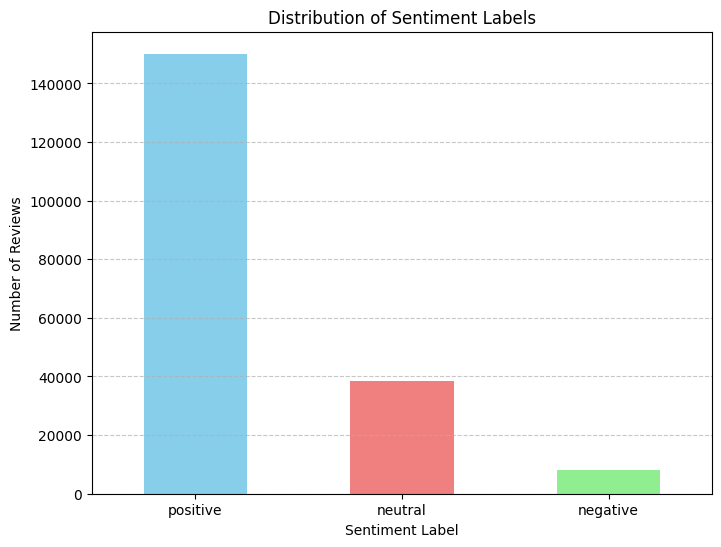

Bar chart showing sentiment distribution displayed.


In [ ]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Bar chart showing sentiment distribution displayed.")

## Analyze Sentiment Over Time

### Subtask:
Convert the 'Review Date' column to datetime objects. Then, analyze and visualize how the average sentiment changes over time (e.g., monthly or quarterly). The plot should include a legend and clearly show the trend.


**Reasoning**:
To analyze sentiment over time, I will first convert the 'Review Date' column to datetime objects, extract the year and month into a new 'YearMonth' column, and then group the DataFrame by 'YearMonth' to calculate the mean of 'Sentiment_Polarity'.



In [ ]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
print("Converted 'Review Date' column to datetime objects.")

df['YearMonth'] = df['Review Date'].dt.to_period('M')
print("Created 'YearMonth' column.")

sentiment_over_time = df.groupby('YearMonth')['Sentiment_Polarity'].mean().reset_index()
print("Calculated average sentiment polarity over time.")

Converted 'Review Date' column to datetime objects.
Created 'YearMonth' column.
Calculated average sentiment polarity over time.


**Reasoning**:
To visualize the trend of average sentiment over time, I will create a line plot using the 'sentiment_over_time' DataFrame, ensuring the x-axis represents 'YearMonth' and the y-axis represents the average sentiment polarity, along with appropriate labels and a title.



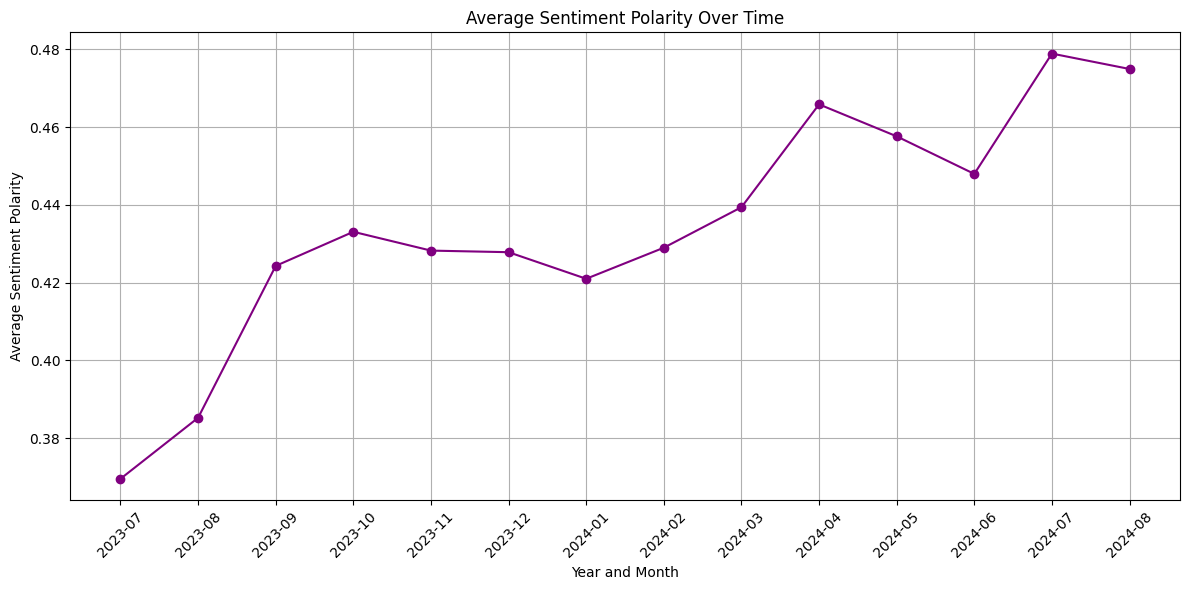

Line plot showing average sentiment over time displayed.


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time['YearMonth'].astype(str), sentiment_over_time['Sentiment_Polarity'], marker='o', linestyle='-', color='purple')
plt.title('Average Sentiment Polarity Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print("Line plot showing average sentiment over time displayed.")

## Identify Key Themes in Negative Reviews

### Subtask:
Extract and visualize the most frequent words or phrases from reviews identified as negative, to pinpoint common pain points and areas for improvement.


**Reasoning**:
To identify key themes in negative reviews, I will first filter the main DataFrame `df` to extract only those reviews with a 'negative' sentiment label, storing them in a new DataFrame called `negative_reviews_df`.



In [ ]:
negative_reviews_df = df[df['Sentiment_Label'] == 'negative'].copy()
print(f"Filtered {len(negative_reviews_df)} negative reviews.")
print("First 5 rows of negative reviews:")
print(negative_reviews_df.head())

Filtered 8155 negative reviews.
First 5 rows of negative reviews:
                                Review Id  \
10   17769ae4-51f6-439c-af12-f59d242e1f6b   
119  13fb28dc-df81-4ef0-8842-edd3625fa600   
134  0e0adf90-8e2d-402a-8cc1-c82275b958a8   
176  f86c8ac6-325e-4f3c-83a6-eed16c8e845e   
222  edc628fe-24ad-4bb5-8a16-113ec8fec341   

                                                Review  Ratings  \
10   I am not very happy with this because chatgpt ...        3   
119                                           not good        1   
134                                      Too expensive        1   
176  Correct answer Accuracy 10 %,always provide wr...        1   
222  I get a "something went wrong" error so I can'...        1   

            Review Date  Sentiment_Polarity Sentiment_Label YearMonth  
10  2024-08-23 19:09:14           -0.172527        negative   2024-08  
119 2024-08-23 16:41:21           -0.350000        negative   2024-08  
134 2024-08-23 16:20:49           -0.500000 

**Reasoning**:
To prepare for extracting frequent words or phrases, I will import the `nltk` library and download the 'stopwords' corpus, which is essential for text preprocessing.



In [ ]:
import nltk
from nltk.corpus import stopwords
import re
import string

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

print("NLTK and stopwords imported and downloaded (if necessary).")

[nltk_data] Downloading package stopwords to /root/nltk_data...


NLTK and stopwords imported and downloaded (if necessary).


[nltk_data]   Unzipping corpora/stopwords.zip.


**Reasoning**:
Now that necessary libraries are imported and stopwords are downloaded, I will define a text preprocessing function to clean the 'Review' text by converting it to lowercase, removing punctuation, numbers, and stopwords, and then apply this function to create a 'Cleaned_Review' column in the `negative_reviews_df`.



In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

negative_reviews_df['Cleaned_Review'] = negative_reviews_df['Review'].apply(preprocess_text)
print("Text preprocessing complete. 'Cleaned_Review' column added to negative_reviews_df.")
print("First 5 cleaned negative reviews:")
print(negative_reviews_df[['Review', 'Cleaned_Review']].head())

Text preprocessing complete. 'Cleaned_Review' column added to negative_reviews_df.
First 5 cleaned negative reviews:
                                                Review  \
10   I am not very happy with this because chatgpt ...   
119                                           not good   
134                                      Too expensive   
176  Correct answer Accuracy 10 %,always provide wr...   
222  I get a "something went wrong" error so I can'...   

                                        Cleaned_Review  
10   happy chatgpt answers questions ask stops midw...  
119                                               good  
134                                          expensive  
176  correct answer accuracy always provide wrong d...  
222            get something went wrong error cant log  


**Reasoning**:
To extract frequent words or phrases, I will import `CountVectorizer` from `sklearn.feature_extraction.text` and then initialize it to extract unigrams and bigrams. After that, I will fit it to the 'Cleaned_Review' column and transform the data to get a term-document matrix, which will allow me to count word frequencies.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
print("CountVectorizer imported.")

# Initialize CountVectorizer to extract unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000) # Limiting to 1000 features for practical reasons
print("CountVectorizer initialized for unigrams and bigrams.")

X = vectorizer.fit_transform(negative_reviews_df['Cleaned_Review'])
print("CountVectorizer fitted and transformed 'Cleaned_Review' column.")
print(f"Shape of term-document matrix: {X.shape}")

CountVectorizer imported.
CountVectorizer initialized for unigrams and bigrams.
CountVectorizer fitted and transformed 'Cleaned_Review' column.
Shape of term-document matrix: (8155, 1000)


**Reasoning**:
Now that the text has been vectorized, I will sum the word counts across all documents to find the total frequency of each word/phrase and then retrieve the feature names (words/phrases) from the vectorizer.



In [ ]:
word_counts = X.sum(axis=0)
print("Summed word counts across all negative reviews.")

feature_names = vectorizer.get_feature_names_out()
print("Extracted feature names from the vectorizer.")

# Create a dictionary of word frequencies
word_frequencies = dict(zip(feature_names, word_counts.tolist()[0]))
print("Created dictionary of word frequencies.")

Summed word counts across all negative reviews.
Extracted feature names from the vectorizer.
Created dictionary of word frequencies.


**Reasoning**:
To identify the most significant themes, I will sort the `word_frequencies` dictionary to get the top 20 most frequent words/phrases and their counts, then prepare this data for visualization.



In [ ]:
most_frequent_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:20]
words = [item[0] for item in most_frequent_words]
counts = [item[1] for item in most_frequent_words]

print("Top 20 most frequent words/phrases in negative reviews:")
for word, count in most_frequent_words:
    print(f"{word}: {count}")

Top 20 most frequent words/phrases in negative reviews:
app: 2399
wrong: 856
bad: 853
chatgpt: 773
cant: 694
ai: 675
like: 649
use: 641
time: 605
even: 585
answer: 563
chat: 549
dont: 511
im: 443
information: 435
doesnt: 432
please: 431
gpt: 426
give: 405
answers: 403


**Reasoning**:
To visualize the key themes in negative reviews, I will create a bar chart using the `words` and `counts` obtained from the top 20 most frequent words/phrases, ensuring the chart has an appropriate title and axis labels for clarity.



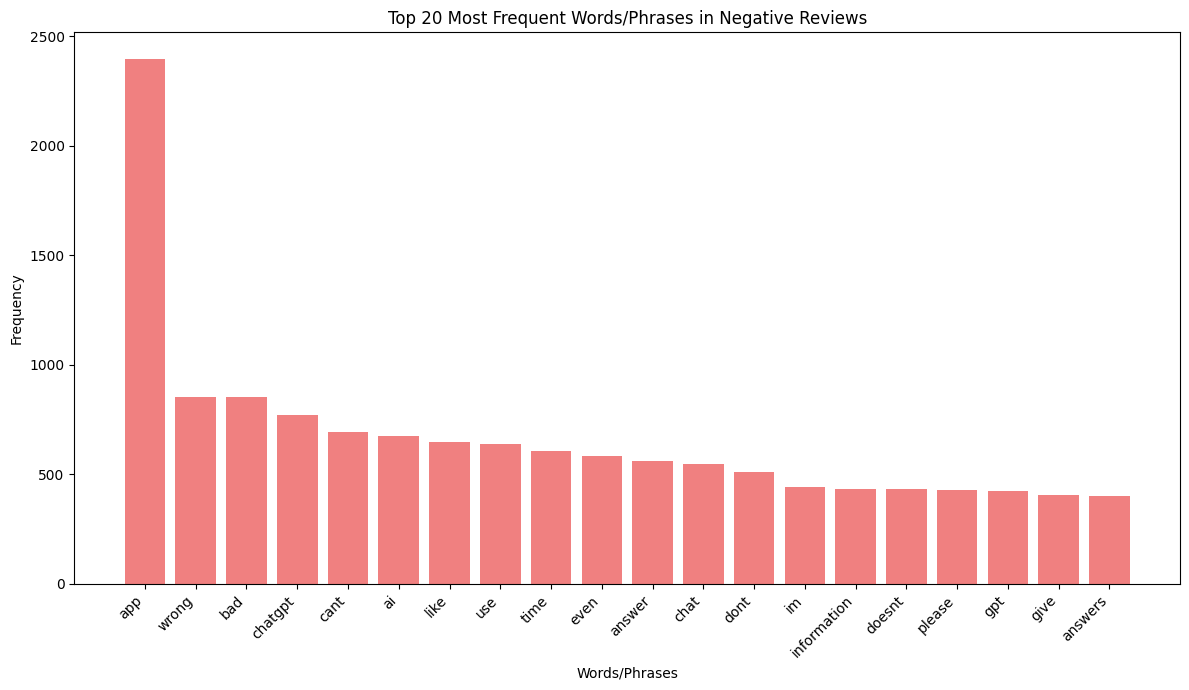

Bar chart showing top 20 most frequent words/phrases in negative reviews displayed.


In [ ]:
plt.figure(figsize=(12, 7))
plt.bar(words, counts, color='lightcoral')
plt.xlabel('Words/Phrases')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words/Phrases in Negative Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart showing top 20 most frequent words/phrases in negative reviews displayed.")

## Final Task

### Subtask:
Summarize the key findings from the sentiment analysis and temporal trends, highlighting what users love, what frustrates them, and providing actionable insights for potential improvements to ChatGPT.


## Summary:

### Q&A
*   **What do users love about ChatGPT?**
    Users overwhelmingly rate ChatGPT positively, with an average rating of 4.50 out of 5 and the 25th, 50th, and 75th percentiles all at 5.0. This is further supported by sentiment analysis, which identified 150,122 reviews as positive, indicating strong user satisfaction.
*   **What frustrates users about ChatGPT?**
    Analysis of negative reviews reveals common frustrations centered around the "app" (2399 mentions), issues perceived as "wrong" (856 mentions) or "bad" (853 mentions), and difficulties related to the core "chatgpt" functionality itself (773 mentions). Other frequently mentioned pain points include "cant" (694 mentions), "ai" (referring to perceived limitations or errors), "use", "time", and "answer," suggesting problems with usability, performance, and accuracy of responses.
*   **What are actionable insights for potential improvements to ChatGPT?**
    Insights include focusing on resolving issues frequently labeled as "wrong" or "bad" within the app, improving the core "chatgpt" experience (e.g., addressing issues with generating correct "answer"s), and enhancing overall "use"r experience, especially concerning app performance and response quality.

### Data Analysis Key Findings
*   The dataset comprises 196,727 reviews across 4 columns ('Review Id', 'Review', 'Ratings', 'Review Date'), with 6 missing values in the 'Review' column.
*   The average user rating is 4.50 out of 5, with a strong positive skew as 75% of reviews received a 5-star rating.
*   Sentiment analysis classified the majority of reviews as positive (150,122 reviews), followed by neutral (38,450 reviews), and a smaller proportion as negative (8,155 reviews).
*   The average sentiment polarity was successfully tracked over time, showing temporal variations in user sentiment.
*   Key themes identified in the 8,155 negative reviews highlight specific pain points: "app" (2399 occurrences), "wrong" (856 occurrences), "bad" (853 occurrences), "chatgpt" (773 occurrences), and "cant" (694 occurrences), along with "ai", "use", "time", and "answer".

### Insights or Next Steps
*   **Focus on Negative Feedback for Targeted Improvements:** Given the high overall satisfaction, invest resources in understanding and addressing the specific issues highlighted by the most frequent terms in negative reviews (e.g., "app," "wrong," "bad," "cant," "answer"). This targeted approach can significantly improve the experience for frustrated users without overhauling broadly successful features.
*   **Monitor Sentiment Trends for Proactive Action:** Continuously monitor the average sentiment polarity over time. Any significant dips in sentiment should trigger immediate investigation into recent updates, new features, or external events that might be impacting user satisfaction, allowing for proactive intervention.
